In [1]:
#Import Libraries
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data set
df = pd.read_csv(r'C:\Users\User\Desktop\SLIIT\3rd Year DS\2nd Sem\FDM\Project 1\Preprocessed_data.csv')

In [3]:
#Prepare X and Y data set
x_data = df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features

y_data = df['pets_allowed'] # Labels




In [5]:
#Splitting the data set into Train set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 1)

In [6]:
#Make the Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

ypred = knn_clf.predict(X_test) #These are the predicted output values

In [7]:
#the scaler model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
#fitting and standardization
train_scaled = scaler.fit_transform(X_train)

test_scaled = scaler.transform(X_test)

In [11]:
#to store rmse values for different k
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = []

#try running from k=1 through 20 and record testing accuracy
for K in range(20):

    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    #fit the model
    model.fit(X_train, y_train) 

    #make prediction on test set
    pred = model.predict(X_test)

    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 

    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 0.3727379653542633
RMSE value for k =  2 is : 0.3454637552121638
RMSE value for k =  3 is : 0.33874893562875447
RMSE value for k =  4 is : 0.33697785009041914
RMSE value for k =  5 is : 0.3371161812675628
RMSE value for k =  6 is : 0.33775483079309454
RMSE value for k =  7 is : 0.3394816235811109
RMSE value for k =  8 is : 0.34062930458387436
RMSE value for k =  9 is : 0.3418722954386935
RMSE value for k =  10 is : 0.3430141277597648
RMSE value for k =  11 is : 0.34451743420786085
RMSE value for k =  12 is : 0.34605093364105066
RMSE value for k =  13 is : 0.3475513036451523
RMSE value for k =  14 is : 0.3486729439057657
RMSE value for k =  15 is : 0.3498341662306957
RMSE value for k =  16 is : 0.35078884243195696
RMSE value for k =  17 is : 0.35194282383246334
RMSE value for k =  18 is : 0.35313051317637906
RMSE value for k =  19 is : 0.3542876564201352
RMSE value for k =  20 is : 0.35513347249316735


In [12]:
#Training
#Create KNN Classifier: k=0.314
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

#Prediction
y_pred = classifier.predict(X_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 85.00876157779923


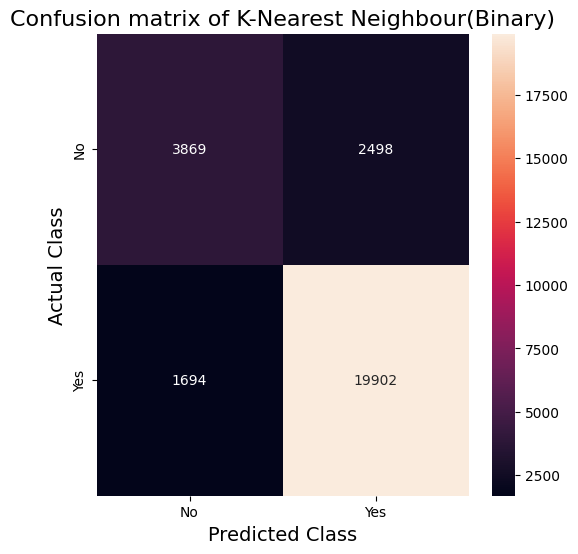

In [14]:
#confusion matrix creation
from sklearn.metrics import  confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

#Plot the Confusion Matrix
LABELS=['No','Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of K-Nearest Neighbour(Binary)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [15]:
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])
Actual = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])

pd.crosstab(Actual, Predicted, 
            rownames=['Predicted Class'], 
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Pet Allowed,Pet Not Allowed,Total Amount
Predicted Class,,,
Pet Allowed,19902,2498,22400
Pet Not Allowed,1694,3869,5563
Total Amount,21596,6367,27963
